In [17]:
import scipy.stats as stats
from  scipy.stats  import  expon  
from  scipy.stats  import  norm 
import  matplotlib.pyplot  as  plt
import numpy as np
%matplotlib  inline
MAXSIZE = 1000
N1=5
N2=10
N3=50
mydata = np.array([[N1,1.,0.,0.,0.], [N2,1.,0.,0.,0.], [N3,1.,0.,0.,0.]]) # table for results

### Построение графиков экспоненциальной функции и ее плотности при $\lambda = 1$

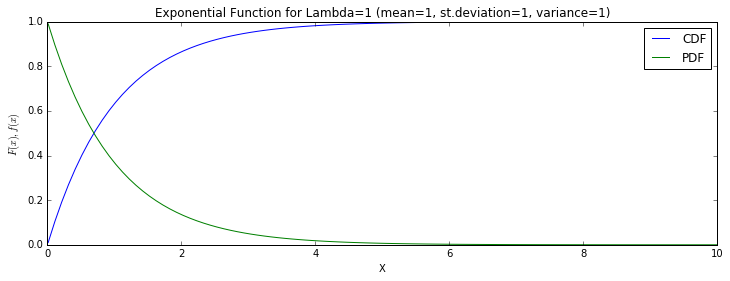

In [18]:
# Draw Cumulative Distribution Function (CDF) and Probability Density Function (PDF)
x = np.linspace(0.01, 10., 100)
plt.figure(figsize=(12,4))
plt.xlabel("X")
plt.ylabel("$F(x), f(x)$")
plt.plot(x, expon.cdf(x), label="CDF")
plt.plot(x, expon.pdf(x), label="PDF")
plt.legend(loc="upper right")
plt.title("Exponential Function for Lambda=1 (mean=1, st.deviation=1, variance=1)")
plt.show()

### Построение гистограммы плотности экспоненциальной функции и графика ее апроксимации

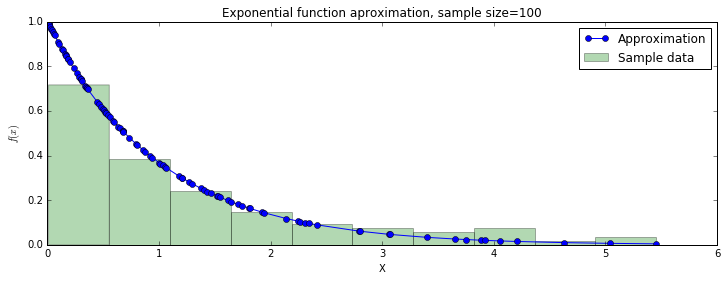

In [19]:
# Histogramm of exponential function sample and its approximation 
h = sorted(expon.rvs(size=100)) 
f = expon.pdf(h)  
plt.figure(figsize=(12,4))
plt.plot(h,f,'-o',label="Approximation")
plt.hist(h,normed=True, alpha= 0.3, label="Sample data") 
plt.xlabel("X")
plt.ylabel("$f(x)$")
plt.legend(loc="best")
plt.title("Exponential function aproximation, sample size=100")
plt.show()         

### Гист-ма распределения выборочных средних (размер выборки=5), расчет среднего и ср.кв.отклонения

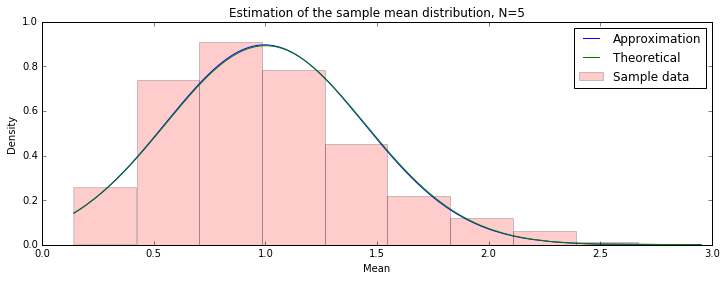

In [20]:
# Estimation of the sample mean distribution for exponential function, sample size=N1, 1000 attempts 
m = np.zeros(shape=(MAXSIZE))
for  i  in  xrange  (0,  MAXSIZE, 1):
    r  =  expon.rvs(size= N1)
    m[i] = float(np.mean(r))     #  m[i] = sample mean of N elements for i-th attempt
m = sorted(m)
Mm = np.mean(m)    
Ds = np.std(m)     
mydata[0,2] = Mm   # среднее выборки
mydata[0,3] = np.sqrt(1./float(N1))  # теоретическое среднеквадратичное отклонение выборки
mydata[0,4] = Ds   # среднеквадратичное отклонение выборки

f1 = stats.norm.pdf(m, Mm, Ds);  # апроксимация нормальным распределением на базе экпериментальных данных
f2 = stats.norm.pdf(m, 1., np.sqrt(1./N1)) # апроксимация нормальным распределением на базе теор данных

plt.figure(figsize=(12,4))
plt.plot(m,f1, label="Approximation")
plt.plot(m,f2, label="Theoretical")
plt.hist(m,normed=True, label="Sample data", alpha= 0.2)    
plt.legend(loc="best")
plt.title("Estimation of the sample mean distribution, N=5")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.show() 

### Гист-ма распределения выборочных средних (размер выборки=10), расчет среднего и ср.кв.отклонения

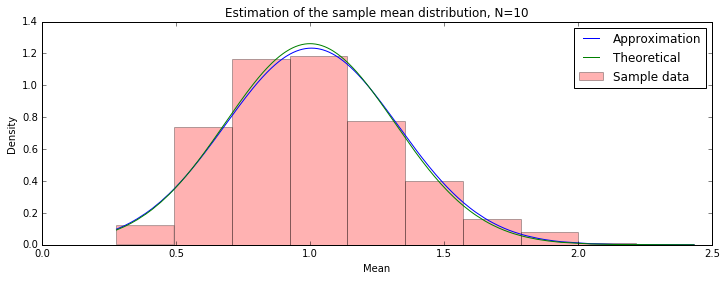

In [21]:
# Estimation of the sample mean distribution for exponential function, sample size=N2, 1000 attempts 
m = np.zeros(shape=(MAXSIZE))
for  i  in  xrange  (0,  MAXSIZE, 1):
    r  =  expon.rvs(size= N2)
    m[i] = float(np.mean(r))     # m[i] = sample mean of N elements for i-th attempt
m = sorted(m)
Mm = np.mean(m)
Ds = np.std(m)
mydata[1,2] = Mm   # среднее выборки
mydata[1,3] = np.sqrt(1./float(N2))  # теоретическое среднеквадратичное отклонение выборки
mydata[1,4] = Ds   # среднеквадратичное отклонение выборки

f1 = stats.norm.pdf(m, Mm, Ds);  # апроксимация нормальным распределением на базе экпериментальных данных
f2 = stats.norm.pdf(m, 1., np.sqrt(1./N2))  # апроксимация нормальным распределением на базе теор. данных
plt.figure(figsize=(12,4))
plt.plot(m,f1, label="Approximation")
plt.plot(m,f2, label="Theoretical")
plt.hist(m,normed=True, label="Sample data", alpha= 0.3)      #use this to draw histogram of your data
plt.legend(loc="best")
plt.title("Estimation of the sample mean distribution, N=10")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.show()         


### Гист-ма распределения выборочных средних (размер выборки=50), расчет среднего и ср.кв.отклонения

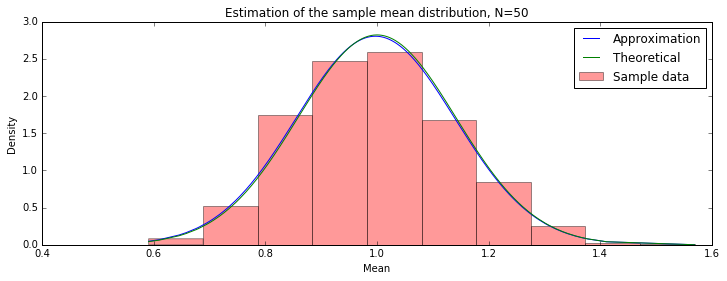

In [22]:
# Estimation of the sample mean distribution for exponential function, sample size=N3, 1000 attempts 
m = np.zeros(shape=(MAXSIZE))
for  i  in  xrange  (0,  MAXSIZE, 1):
    r  =  expon.rvs(size= N3)
    m[i] = float(np.mean(r))     #  m[i] = sample mean of N elements for i-th attempt
m = sorted(m)
Mm = np.mean(m)   
Ds = np.std(m)
mydata[2,2] = Mm   # среднее выборки
mydata[2,3] = np.sqrt(1./float(N3))  # теоретическое среднеквадратичное отклонение выборки
mydata[2,4] = Ds   # среднеквадратичное отклонение выборки

f1 = stats.norm.pdf(m, Mm, Ds);  # апроксимация нормальным распределением на базе экпериментальных данных
f2 = stats.norm.pdf(m, 1., np.sqrt(1./N3)) # апроксимация нормальным распределением на базе теор данных
plt.figure(figsize=(12,4))
plt.plot(m,f1, label="Approximation")
plt.plot(m,f2, label="Theoretical")
plt.hist(m,normed=True, label="Sample data", alpha= 0.4)     
plt.legend(loc="best")
plt.title("Estimation of the sample mean distribution, N=50")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.show()         


In [23]:
import pandas as pd
df = pd.DataFrame(mydata)
df.columns = ['Выборка', 'Среднее(теор)','Среднее', 'Отклонение(теор)', 'Отклонение']

### Результаты испытаний:

In [24]:
print df.to_string(index=False)

Выборка  Среднее(теор)   Среднее  Отклонение(теор)  Отклонение
    5.0            1.0  0.996618          0.447214    0.445357
   10.0            1.0  1.005330          0.316228    0.323412
   50.0            1.0  0.997181          0.141421    0.142300


### Выводы:
#### 1. Распределение выборочных средних одинаково распределенных взаимно независимых случайных величин достаточно хорошо описывается нормальным распределением 
#### 2. При возрастании размера выборки N точность нормальной апроксимации увеличивается
#### 3. Среднее квадратическое отклонение среднего арифметического одинаково распределенных взаимно независимых случайных величин в $\sqrt {N}$ раз меньше среднего квадратического отклонения  каждой из величин:
## $\bar\sigma_n = \frac{\sigma} {\sqrt {N}}$